In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [2]:
#Tensorflow 설치하기

In [3]:
import tensorflow as tf
from tensorflow import keras

* 데이터 프레임 관련 라이브러리

In [4]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### **나.  학습데이터 불러오기**

In [5]:
train_x = pd.read_csv('/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.07_미니프로젝트 2차 (2)/train_x.csv', index_col=0)
test_x = pd.read_csv('/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.07_미니프로젝트 2차 (2)/test_x.csv', index_col=0)
train_y = pd.read_csv('/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.07_미니프로젝트 2차 (2)/train_y.csv', index_col=0)
test_y = pd.read_csv('/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.07_미니프로젝트 2차 (2)/test_y.csv', index_col=0)

In [6]:
feature_names = list(train_x)

### **다.  데이터 전처리**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
train_x.describe()

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('embed')_is,html_num_tags('object')_is,url_query_len_is
count,2586.000000,2586.000000,2586.000000,2586.000000,2586.00000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000
mean,56.508894,0.422274,20.501160,2.526295,0.29041,0.058778,4.234053,0.002320,0.218097,8.469838,72.482985,0.997680,1.016628,0.979892,65.245166,0.016241,0.022428,0.064578
std,85.838214,0.862921,10.078656,1.452898,1.20137,0.235254,0.396204,0.048122,0.937711,11.992360,430.759978,0.149772,0.231290,1.640747,396.814806,0.126427,0.148101,0.245828
min,6.000000,0.000000,4.000000,1.000000,0.00000,0.000000,2.737839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.250000,0.000000,14.000000,2.000000,0.00000,0.000000,3.994701,0.000000,0.000000,2.000000,5.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,17.000000,2.000000,0.00000,0.000000,4.198935,0.000000,0.000000,4.000000,31.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,57.000000,1.000000,24.000000,3.000000,0.00000,0.000000,4.474171,0.000000,0.000000,11.750000,59.000000,1.000000,1.000000,1.000000,48.750000,0.000000,0.000000,0.000000
max,1837.000000,14.000000,109.000000,26.000000,18.00000,1.000000,5.821782,1.000000,26.000000,174.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,1.000000,1.000000,1.000000


In [9]:
std_scaler = StandardScaler()
std_scaler.fit(train_x)
train_x = std_scaler.transform(train_x)
test_x = std_scaler.transform(test_x)

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [10]:
# from sklearn.model_selection import train_test_split

In [11]:
# train_test_split 사용

# train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)
# train_x.shape, val_x.shape, train_y.shape, val_y.shape

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [12]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [13]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

### 딥러닝 모델

In [14]:
# 1. import
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
train_x.shape

(2586, 18)

In [16]:
keras.backend.clear_session()
# 2.선언 
il = keras.layers.Input(shape=(18, ))

hl = keras.layers.Dense(512, activation='relu')(il)
hl = keras.layers.Dense(512, activation='relu')(hl)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)

ol = keras.layers.Dense(1, activation='sigmoid')(hl)

dl_model = keras.models.Model(il, ol)

dl_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

dl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 436,737
Trainable params: 436,737
Non-trainable

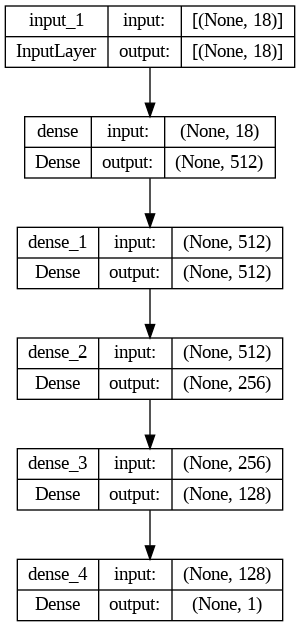

In [17]:
plot_model(dl_model, show_shapes=True)

In [18]:
# 3. fit(), 학습
es = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

# history = dl_model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10000, callbacks=[es])
history = dl_model.fit(train_x, train_y, validation_split=0.2, epochs=10000, callbacks=[es])

Epoch 1/10000
65/65 [==============================] - 3s 9ms/step - loss: 0.4369 - accuracy: 0.8104 - val_loss: 0.3957 - val_accuracy: 0.8263
Epoch 2/10000
65/65 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.8719 - val_loss: 0.3204 - val_accuracy: 0.8784
Epoch 3/10000
65/65 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.8922 - val_loss: 0.3160 - val_accuracy: 0.8784
Epoch 4/10000
65/65 [==============================] - 0s 5ms/step - loss: 0.2422 - accuracy: 0.8999 - val_loss: 0.3890 - val_accuracy: 0.8610
Epoch 5/10000
65/65 [==============================] - 0s 5ms/step - loss: 0.2356 - accuracy: 0.9038 - val_loss: 0.3241 - val_accuracy: 0.8803
Epoch 6/10000
65/65 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.9168 - val_loss: 0.3336 - val_accuracy: 0.8649
Epoch 7/10000
65/65 [==============================] - 0s 5ms/step - loss: 0.1886 - accuracy: 0.9212 - val_loss: 0.3662 - val_accuracy: 0.8649

In [19]:
# 4. predict(), 예측
y_pred = dl_model.predict(test_x)
dl_model.evaluate(test_x, test_y)

21/21 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.8717


[0.28288576006889343, 0.8717156052589417]

In [20]:
# train 및 val 데이터 정확도 확인 
dl_model.evaluate(train_x, train_y)

81/81 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.9053


[0.24431945383548737, 0.9052590727806091]

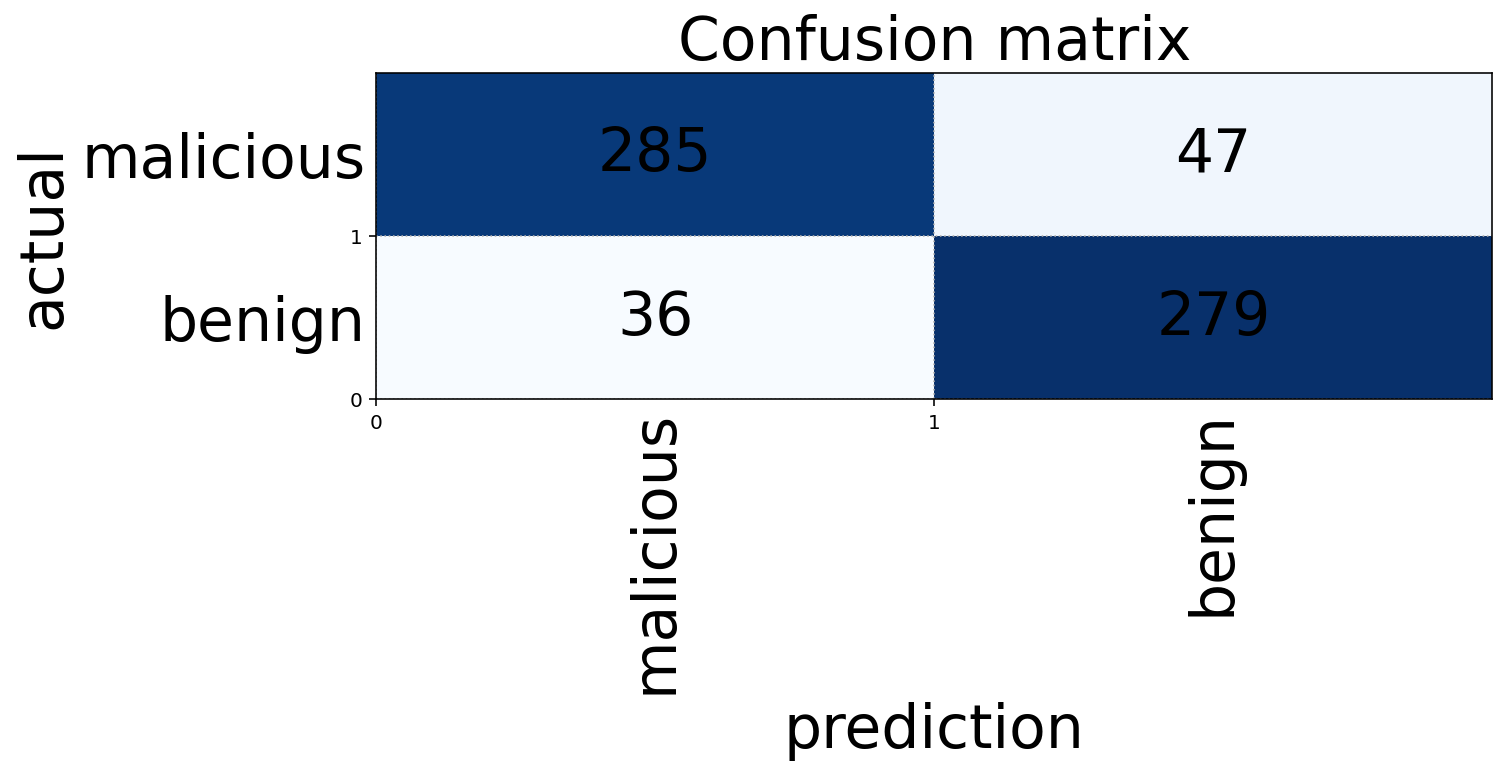

In [22]:
# Test 데이터 결과 Confusion Matrix 확인
y_prob = np.where(y_pred >= 0.5, 1, 0)
confusion = confusion_matrix(test_y, y_prob)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [22]:
# Feature(특징)별 가중치 확인


In [24]:
result = {}
result['Deep Learning'] = 0.8717156052589417

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [87]:
model = LogisticRegression()
cv_score = cross_val_score(model, train_x, train_y, cv=5)
cv_result = {}
cv_result['Logistic Regression'] = cv_score.mean()
print("cv score mean :", cv_score.mean())

model.fit(train_x, train_y)
y_pred = model.predict(test_x)
acc = accuracy_score(test_y, y_pred)
result['Logistic Regression'] = acc
print('Logistic Regression Accuracy :', acc)

cv score mean : 0.8414606095457158
Logistic Regression Accuracy : 0.839258114374034


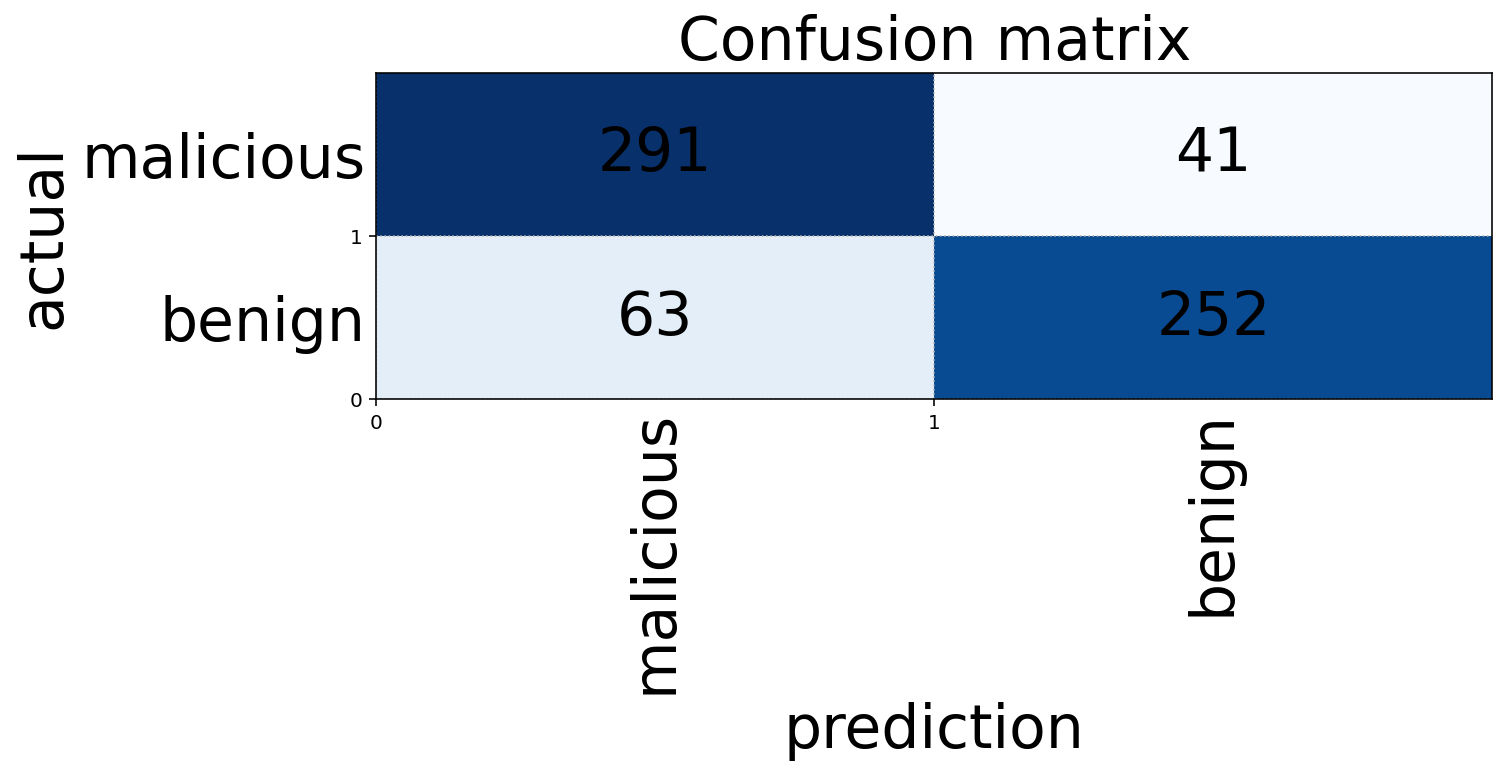

In [88]:
confusion = confusion_matrix(test_y, y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [89]:
# Feature(특징)별 가중치 확인
# Logistic Regression은 나중에 해보기 feature_name 속성이 없어서 다른 방법으로 해봐야함
model.coef_

array([[-0.06173694,  0.71977513,  0.92316393, -0.15499022, -1.4622906 ,
        -0.01238801,  0.10204446,  0.05054005,  0.12811902, -0.5638503 ,
         0.27951314,  0.01290654,  0.34443764,  0.92296128, -5.59828623,
        -0.09013143, -0.30107939,  4.50695615]])

### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model = DecisionTreeClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, train_x, train_y, cv=5)
cv_result['DecisionTree'] = cv_score.mean()
print("cv score mean :", cv_score.mean())

model.fit(train_x, train_y)
y_pred = model.predict(test_x)
acc = accuracy_score(test_y, y_pred)
result['DecisionTree'] = acc
print('DecisionTree Accuracy :', acc)

cv score mean : 0.8932742358274274
DecisionTree Accuracy : 0.884080370942813


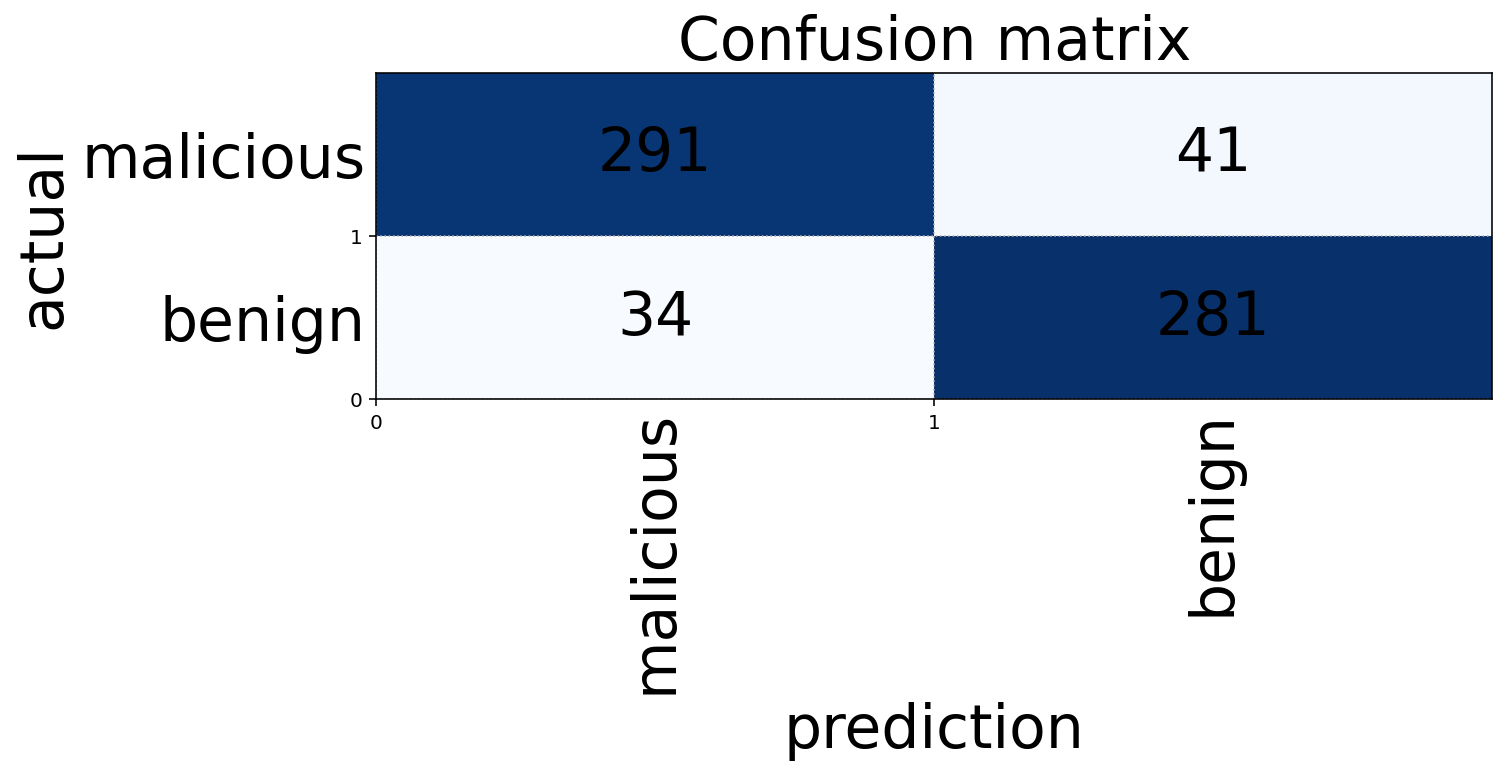

In [92]:
confusion = confusion_matrix(test_y, y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

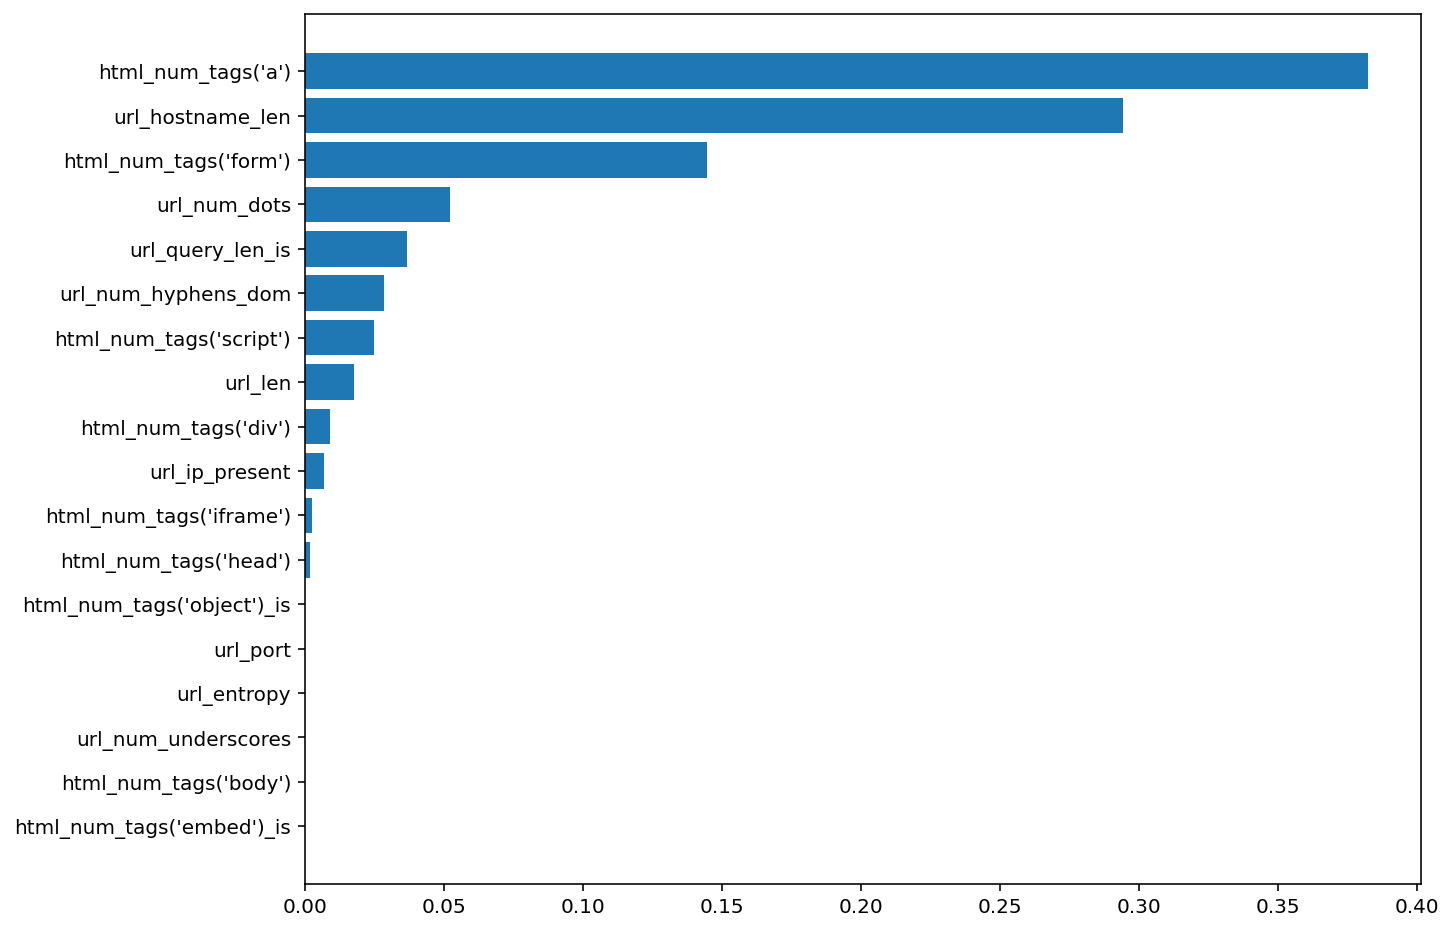

In [93]:
# Feature(특징)별 가중치 확인
# 데이터프레임 만들기 
perf_dic = {'feature':feature_names, 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(df['feature'], df['importance'])
plt.show()

### RandomForest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
model = RandomForestClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, train_x, train_y, cv=5)
cv_result['RandomForest'] = cv_score.mean()
print("cv score mean :", cv_score.mean())

model.fit(train_x, train_y)
y_pred = model.predict(test_x)
acc = accuracy_score(test_y, y_pred)
result['RandomForest'] = acc
print('RandomForest Accuracy :', acc)

cv score mean : 0.9098952226611802
RandomForest Accuracy : 0.8995363214837713


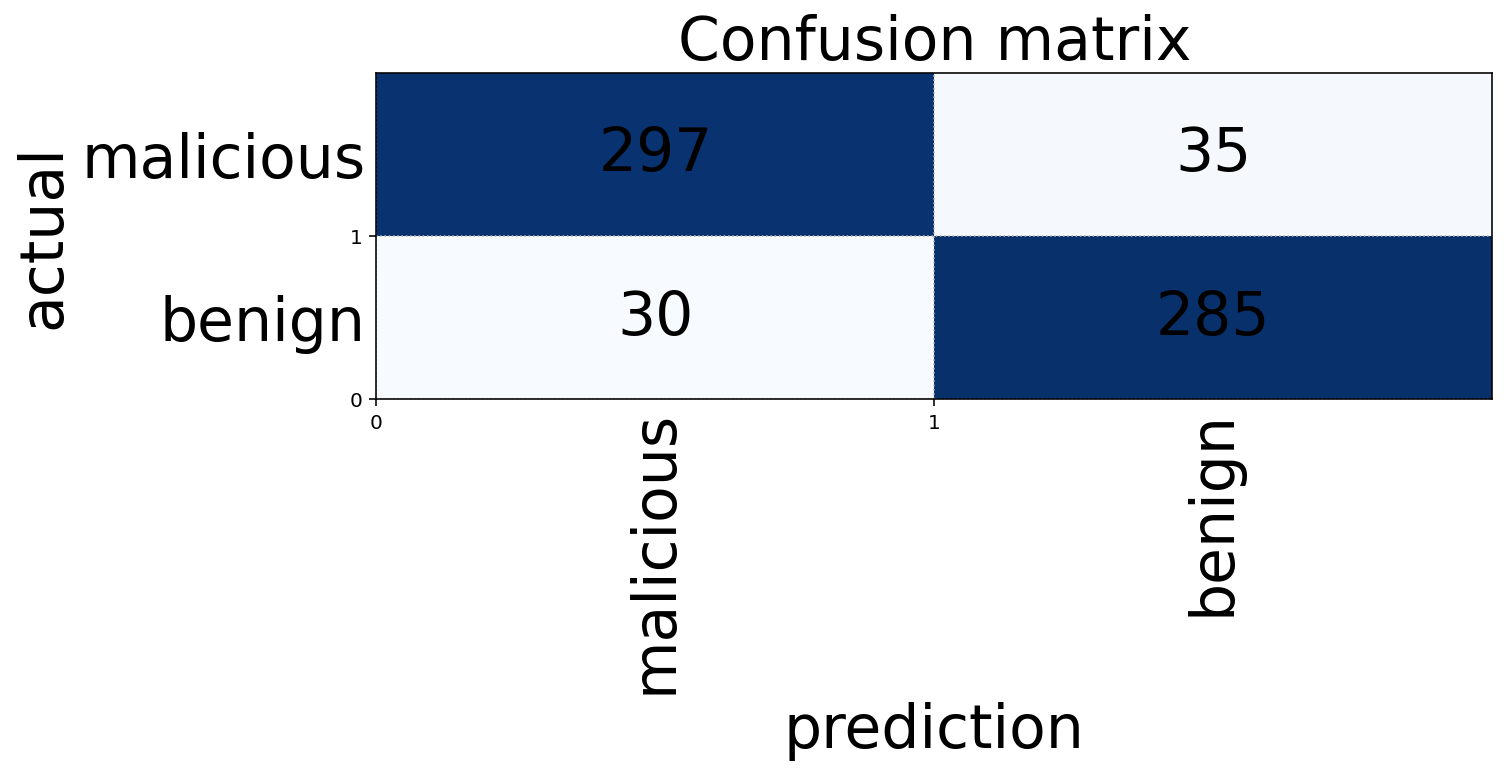

In [96]:
confusion = confusion_matrix(test_y, y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

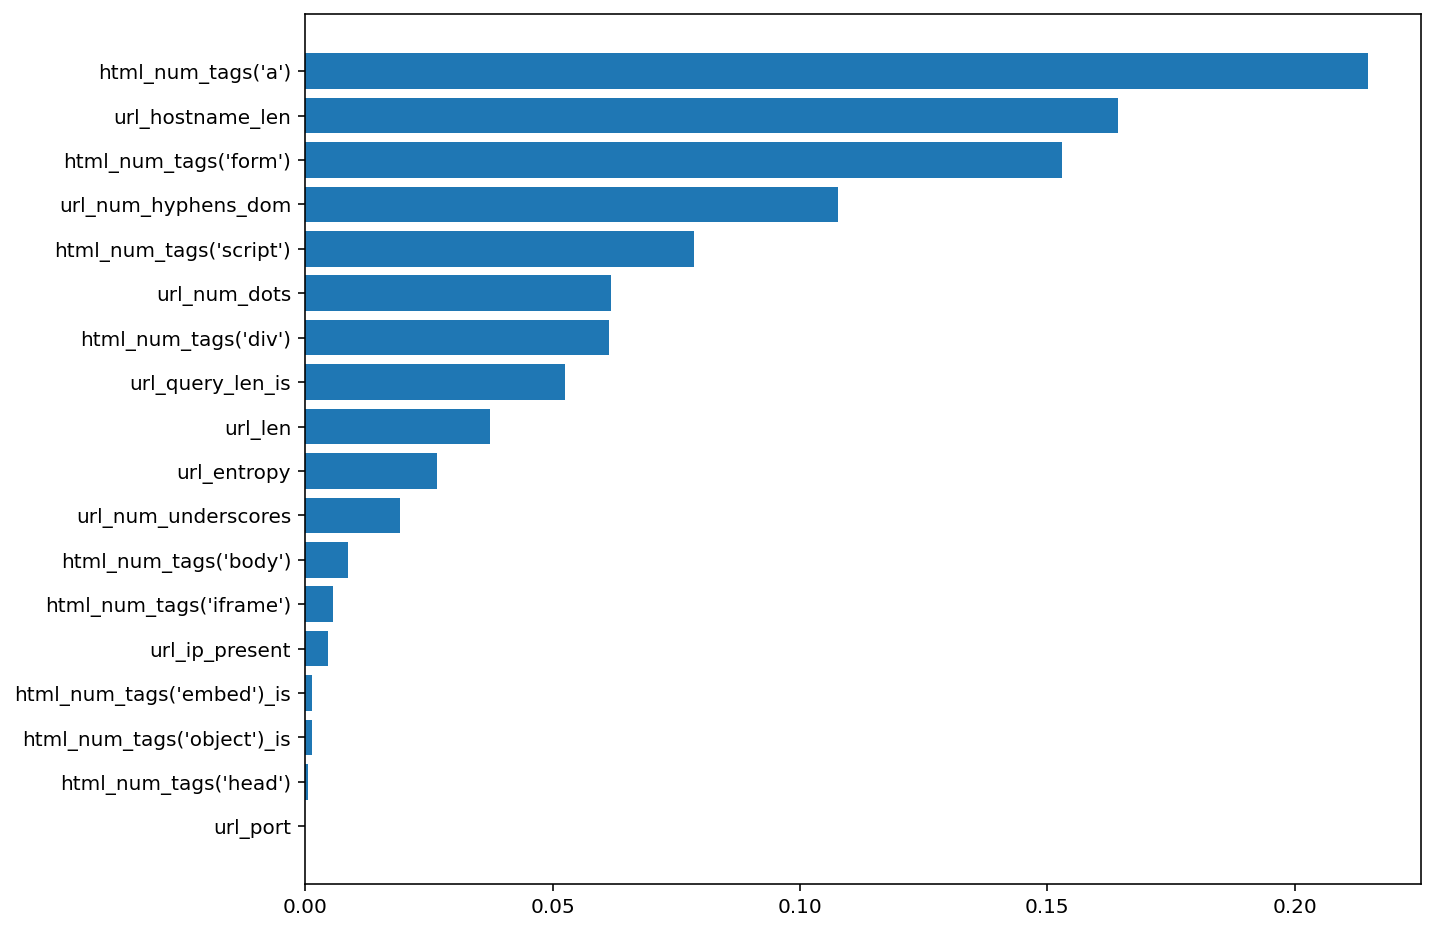

In [97]:
# Feature(특징)별 가중치 확인
# 데이터프레임 만들기 
perf_dic = {'feature':feature_names, 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(df['feature'], df['importance'])
plt.show()

### LightGBM

In [98]:
from lightgbm import LGBMClassifier

In [99]:
model = LGBMClassifier()
cv_score = cross_val_score(model, train_x, train_y, cv=5)
cv_result['LGBM'] = cv_score.mean()
print("cv score mean :", cv_score.mean())

model.fit(train_x, train_y)
y_pred = model.predict(test_x)
acc = accuracy_score(test_y, y_pred)
result['LGBM'] = acc
print('LGBM Accuracy :', acc)

cv score mean : 0.9431528793230921
LGBM Accuracy : 0.9350850077279753


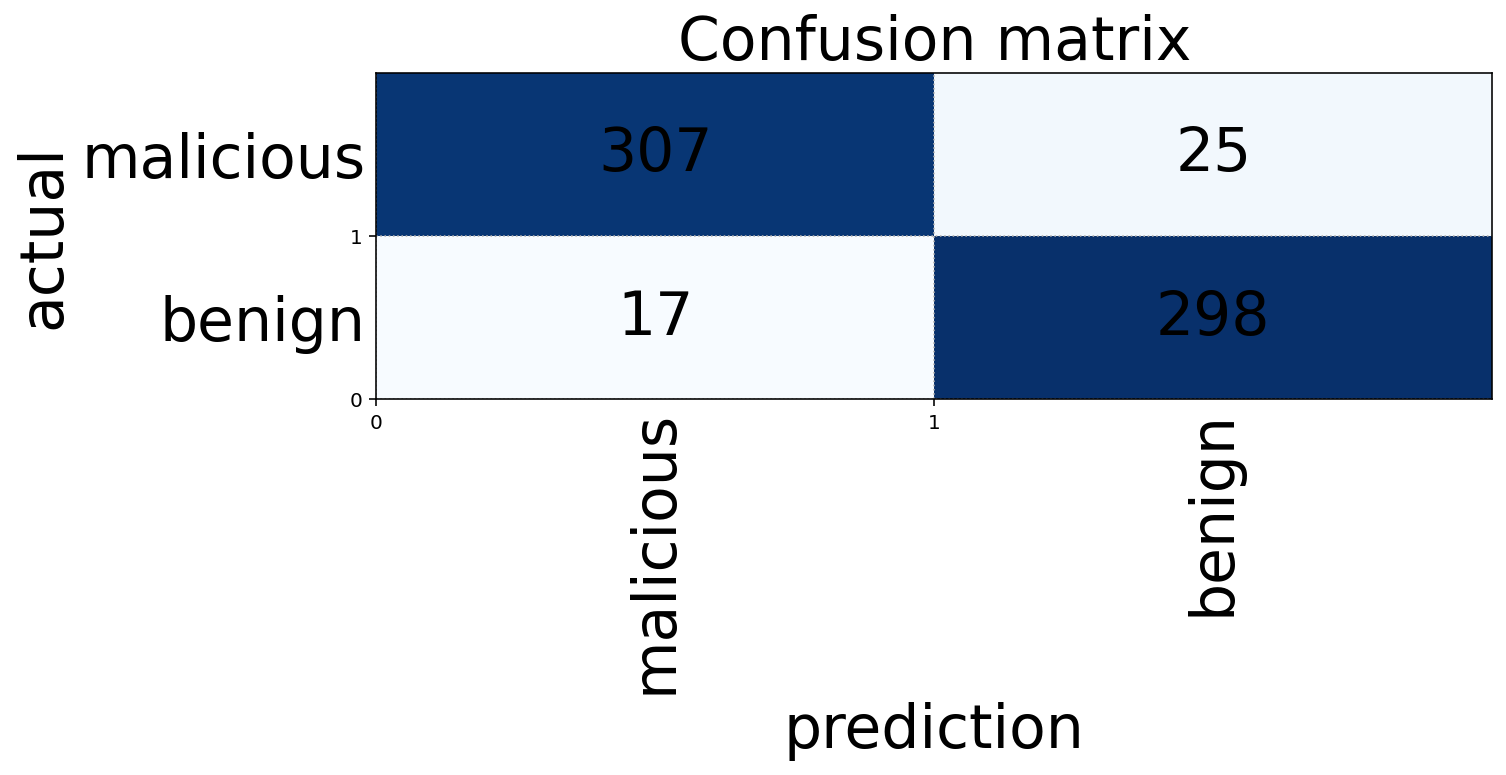

In [100]:
confusion = confusion_matrix(test_y, y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

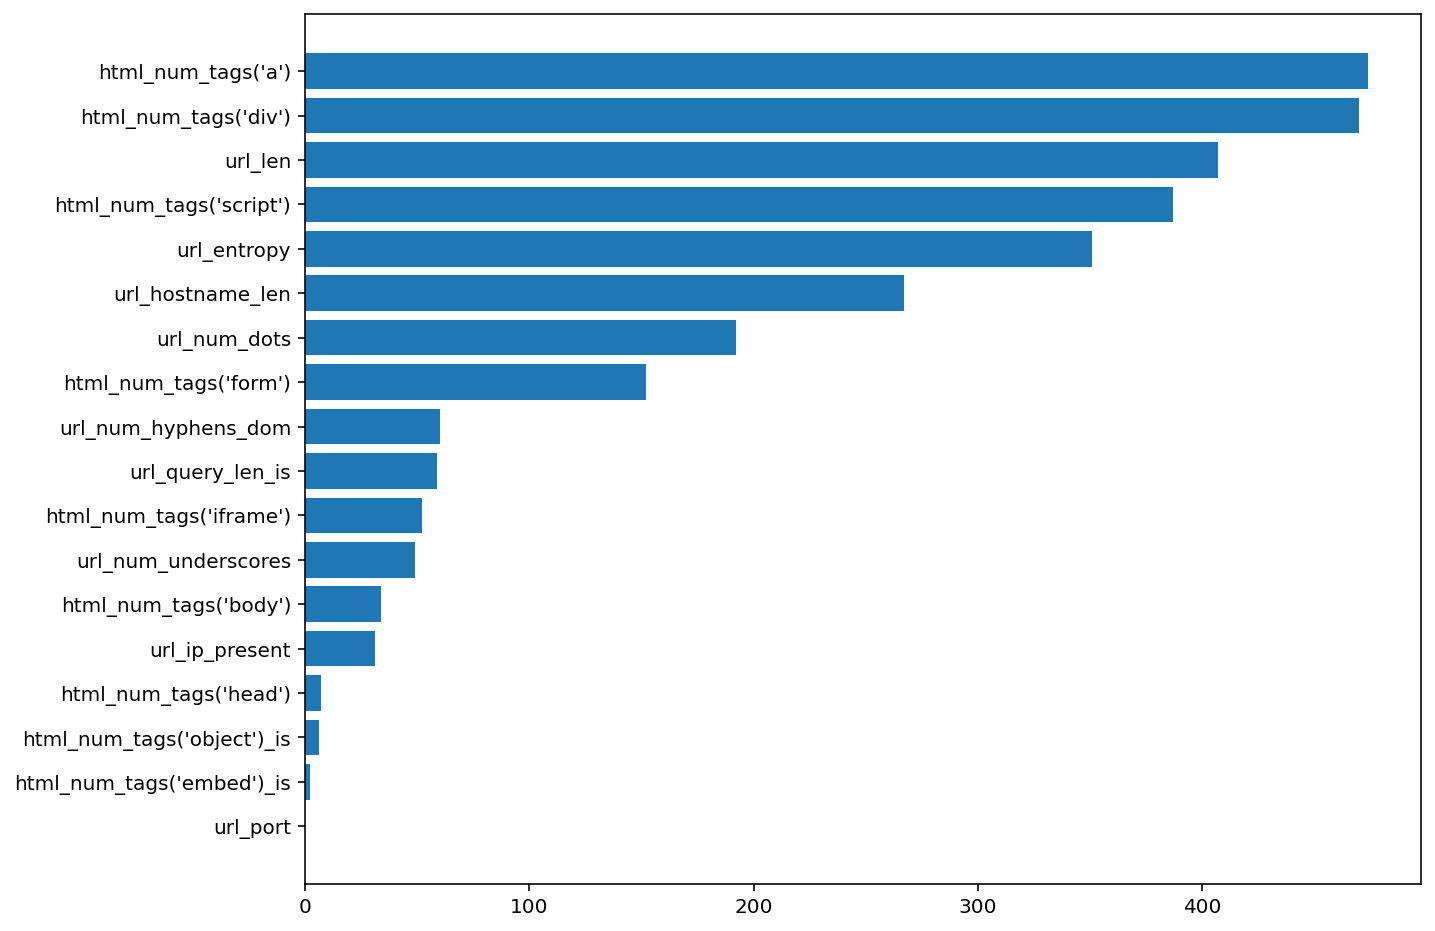

In [101]:
# Feature(특징)별 가중치 확인
# 데이터프레임 만들기 
perf_dic = {'feature':feature_names, 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(df['feature'], df['importance'])
plt.show()

## 예측 성능 비교

In [102]:
cv_result

{'Logistic Regression': 0.8414606095457158,
 'DecisionTree': 0.8932742358274274,
 'RandomForest': 0.9098952226611802,
 'LGBM': 0.9431528793230921}

In [104]:
result

{'Deep Learning': 0.8717156052589417,
 'Logistic Regression': 0.839258114374034,
 'DecisionTree': 0.884080370942813,
 'RandomForest': 0.8995363214837713,
 'LGBM': 0.9350850077279753}

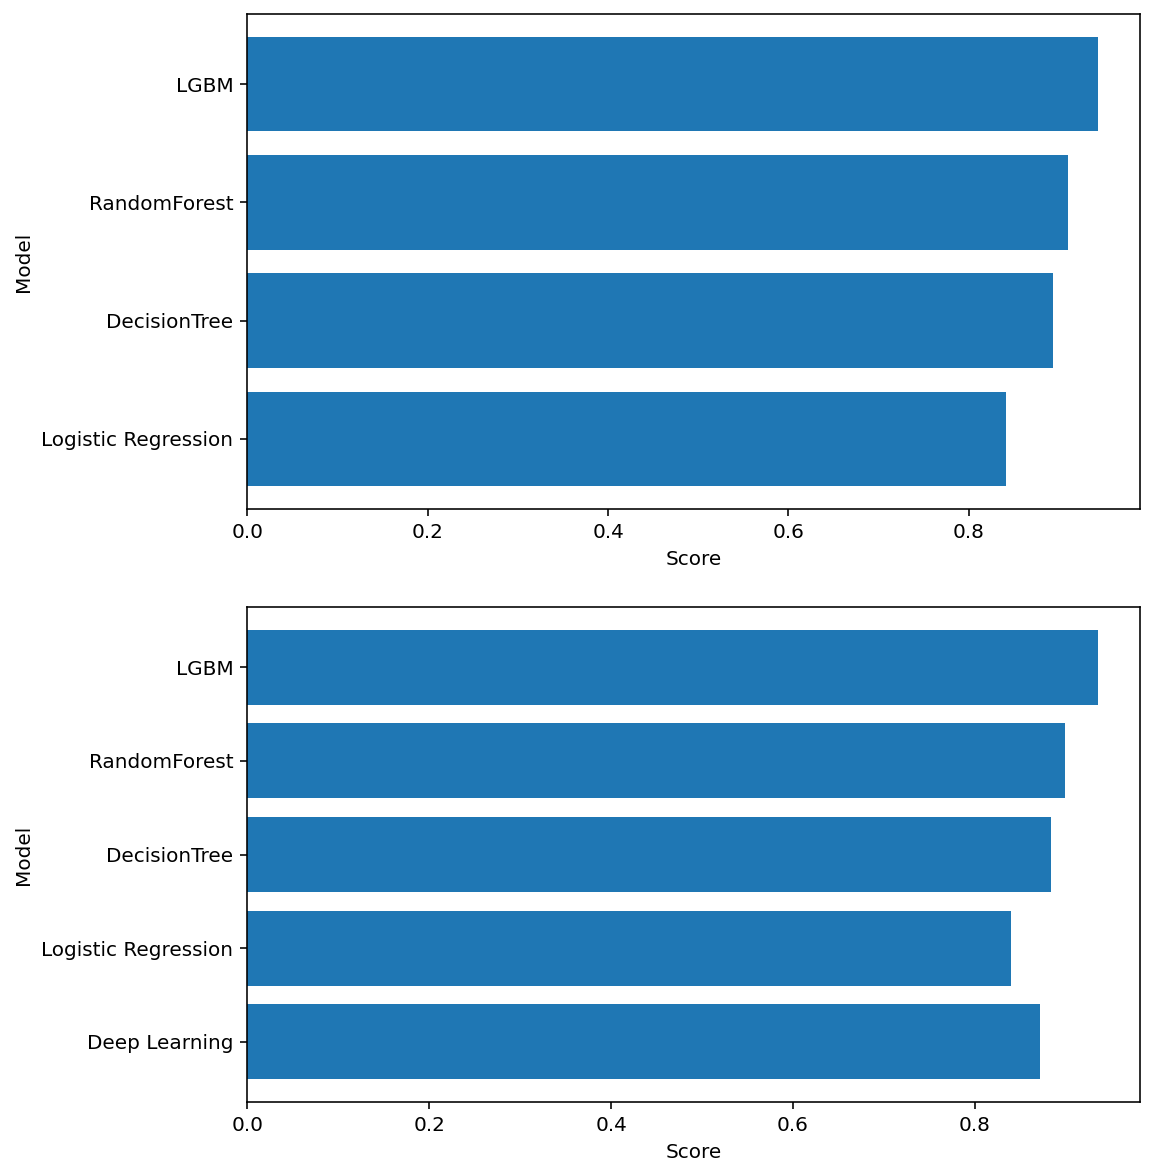

In [108]:
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.barh(list(cv_result), cv_result.values())
plt.xlabel('Score')
plt.ylabel('Model')

plt.subplot(2, 1, 2)
plt.barh(list(result), result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()